# Dimensionality Reduction


What if there was a way you could reduce the number of dimensions in your data and still retain a significant portion of the data's identity?

That is dimensionality reduction in a nutshell. It is a statistical technique that reduces a dataset of `m` dimensions down to `k` while minimizing the loss of information.

**Dimensionality Reduction** can is useful for generalizating, visualizing, and compressing data.

Part of the reason why dimensionality reduction works is because the redundancy that exists in datasets. If you have a dataset of `N` features that are all highly correlated with another, then you don't really have `N` features worth of signal.

Think about the results of a survey asking subjects on their political opinions. The survey asks a respondent to rate how strongly they support/oppose issues on topics such as taxes, abortion, the environment, etc...

Opinions on gun control probably correlate with opinions on abortion and opinions on healtcare probably correlate with opinions on military spending.

A dimensionality reduction technique could compress the results of this survey down to a single dimension that effectively represents a left-right political spectrum. And because of the multicollinearity in the data, the loss of information wouldn't be equal in proportion to the decrease in dimensions.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### World Happiness Report

The data for originates  from the [2022 World Happiness report](https://worldhappiness.report/ed/2022/) and was downloaded from this [kaggle repo](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2022). The following data dictionary explains what the variables mean. You can read the full report [here](https://happiness-report.s3.amazonaws.com/2022/WHR+22.pdf).

**happiness_score:** The national average response to the question of life evaluations. Question asks “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”

**gdp:** GDP per capita (variable name gdp) in purchasing power parity (PPP) at constant 2017 international dollar prices.

**life_expectancy:** Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository 

**social_support:** The national average of the binary responses (either 0 or 1) to the GWP (Gallup World Poll) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

**freedom:** Freedom to make life choices is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**generosity:** Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

**corruption:** The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses. The corruption perception at the national level is just the average response of the overall perception at the individual level.

In [2]:
happiness = pd.read_csv("data/world_happiness.csv")
happiness.head()

,rank,country,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption,continent
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Europe


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             146 non-null    int64  
 1   country          146 non-null    object 
 2   happiness_score  146 non-null    float64
 3   gdp              146 non-null    float64
 4   social_support   146 non-null    float64
 5   life_expectancy  146 non-null    float64
 6   freedom          146 non-null    float64
 7   generosity       146 non-null    float64
 8   corruption       146 non-null    float64
 9   continent        146 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 11.5+ KB


Dimensionality reduction is most effective when there is significant redundancy in the data. By redundancy, we mean a high level of multicollinearity in the data — frequent high correlations between variables in the data.

Let's look at the correlation table for the world happiness data to see if that is the case.

In [4]:
happiness.corr()

,rank,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption
rank,1.000000,-0.980856,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
happiness_score,-0.980856,1.000000,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
gdp,-0.792137,0.763677,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
social_support,-0.773773,0.777889,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
life_expectancy,-0.750945,0.740260,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
freedom,-0.623040,0.624822,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
generosity,-0.032831,0.063785,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107
corruption,-0.403199,0.416216,0.377589,0.223352,0.362626,0.402474,0.096107,1.000000


Do you observe high multicollinearity?

## Principal Component Analysis 

Principal component analysis (PCA) is the most commonly used dimensionality reduction algorithm. It works by transforming a high dimensonal dataset into a smaller one while still retaining a significant amount of the information. The principal components are the outputted variables that are a linear mixture of the original variables. This transformed data are all uncorrelated with one another, with the most valuable informational compressed into the the first few components. 

![](https://miro.medium.com/max/600/1*e_kBZQz2hsa7de6TxpgJqg.gif)
Source: Towards Data Science

PCA first aims to understand how the variables of the data differ from their means and if the relationship between the variables and their means varies across variables. So in order to complete this part, PCA calculates the covariance matrix which has the dimensions of N x N features. Here's the formula to calculate covariance:

![](https://www.gstatic.com/education/formulas2/443397389/en/covariance_formula.svg)

Next up we have to calculate the eigenvectors and eigenvalues. These are linear algebra calculations that are calculated from the covariance matrix. We use the eigenvectors and eigenvalues to calculate the principal components.

The eigenvectors are defined as the directions of axes of the principal components while the eigenvalue refers to the magnitidue of the eigenvector.
![](https://miro.medium.com/max/600/1*BpwgqgR-dVZSmIPKTaM4JQ.gif)


PCA then computes the eigenvectors and orders them from greatest to least — this explains why the first component has the most signal.

Finally PCA transforms the original data by taking the dot product of the transposed eigenvectors and the original dataset.


![](https://devopedia.org/images/article/139/4543.1548137789.jpg)

Source: Devopedia

Grab the numerical data and initialize the PCA algorithm

In [5]:
X = happiness.select_dtypes("number").drop("rank", axis = 1)

We need to scale data because PCA is sensitive to variables with higher variances/ranges. Therefore we want the algorithm working data with all similar variances to avoid that kind of bias.

In [6]:
scale = StandardScaler()
Xs = scale.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)
Xs.head()

,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,2.093431,1.145968,1.261414,1.074531,1.505066,-0.465089,2.984171
1,1.922627,1.291131,1.207681,1.085912,1.388114,0.492316,2.968432
2,1.849689,1.250676,1.483508,1.233865,1.381234,1.486078,0.285018
3,1.808142,1.464851,1.146784,1.341984,1.099173,-0.004565,2.409715
4,1.718586,1.272094,1.075141,1.142817,0.920305,1.498197,2.079207


In [7]:
#Intialize PCA model and set n_components = 2
pca = PCA(n_components=2)

#Fit and transforms
Xp = pca.fit_transform(Xs)
Xp[:5, :]

array([[-3.84898152,  0.60809671],
       [-3.7708422 ,  1.30721183],
       [-3.17810199,  1.20410592],
       [-3.6304752 ,  0.53104787],
       [-3.23043835,  1.67763432]])

Picking a value for `n_components` is not required. We can apply pca to our data without setting a value for `n_components` and it will return a dataset with the same dimensions.

In [8]:
pca = PCA()
Xp = pca.fit_transform(Xs)
Xp[:5, :]

array([[-3.84898152,  0.60809671,  1.93490153, -0.16679461,  0.79600574,
         0.48341062, -0.06977181],
       [-3.7708422 ,  1.30721183,  1.59029752,  0.32794393,  0.60051768,
         0.19562056, -0.13602136],
       [-3.17810199,  1.20410592, -1.12797516,  0.14743245, -0.10591391,
         0.11150016, -0.19574114],
       [-3.6304752 ,  0.53104787,  1.33792014,  0.35149583,  0.33839789,
         0.19589715, -0.13154452],
       [-3.23043835,  1.67763432,  0.52198095,  0.906662  ,  0.20466777,
         0.0841653 , -0.23390804]])

In [9]:
#Shape
Xp.shape

(146, 7)

To get the first two components, select the first two columns.

In [10]:
#Overwrite Xp with just its first two columns.
Xp = Xp[:, :2]
Xp[:5, :]

array([[-3.84898152,  0.60809671],
       [-3.7708422 ,  1.30721183],
       [-3.17810199,  1.20410592],
       [-3.6304752 ,  0.53104787],
       [-3.23043835,  1.67763432]])

In [11]:
#Put pca data into dataframe
Xp = pd.DataFrame(Xp, columns=["comp1", "comp2"])

The great thing about dimensionality reduction is that we can visualize highly dimensional data in 2d or 3d.

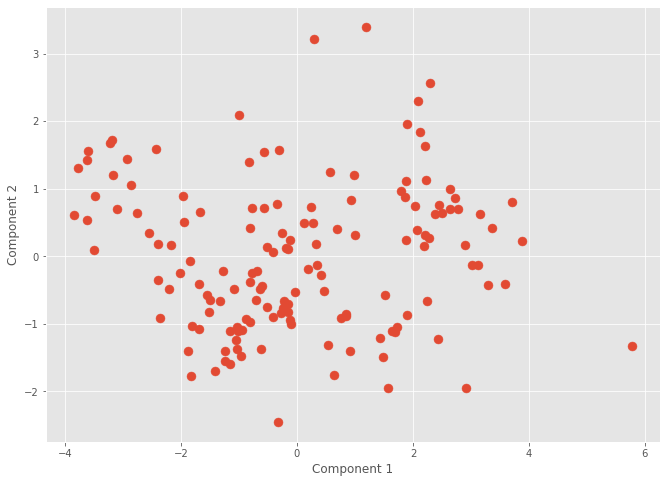

In [12]:
#plot the pca data with a 2d scatter plot
plt.figure(figsize=(11, 8))
plt.scatter(x=Xp["comp1"], y = Xp["comp2"], s=80)
plt.xlabel("Component 1")
plt.ylabel("Component 2");

Let's add continent label to chart.

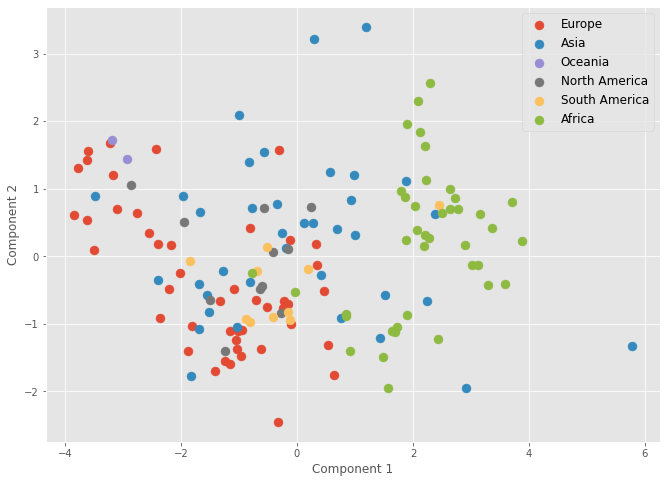

In [14]:
#Add continent to the pca dataset
Xp["continent"] = happiness["continent"].tolist()

plt.figure(figsize=(11, 8))
for continent in Xp.continent.unique():
    data = Xp[Xp.continent == continent]
    
#     data.plot.scatter(x = "comp1", y = "comp2", label = continent)
    plt.scatter(x=data["comp1"], y = data["comp2"], label = continent, s=80)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(fontsize = "large")
    

**Do you see any patterns or trends here?**

### Explained variance

Explained variance informs us how much of the original signal/identity each component possesses from the original dataset. The `explained_variance_ratio_` is normalized version of this variable.

In [15]:
#Explained variance ratio of each component
exp_var_ratio = pca.explained_variance_ratio_.round(3)
exp_var_ratio

array([0.549, 0.17 , 0.113, 0.075, 0.044, 0.025, 0.024])

In [16]:
#The cumulative sum of the explained variance ratio of each component
exp_var_ratio_cs = exp_var_ratio.cumsum()
exp_var_ratio_cs

array([0.549, 0.719, 0.832, 0.907, 0.951, 0.976, 1.   ])

The first two components (a quarter of the original dimensions) net almost two-thirds of the data's explained variance.

Cutting the number of dimensions in half leaves us with 87.7% of the signal.

''

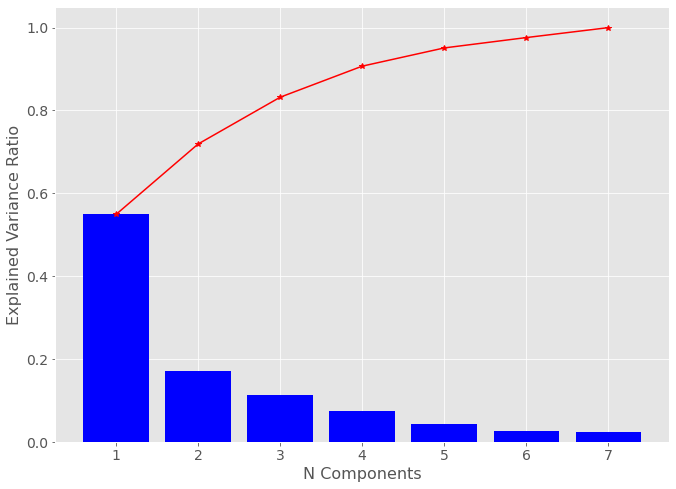

In [17]:
#Plot
plt.figure(figsize=(11, 8))
plt.bar(x=range(1, exp_var_ratio.shape[0] +1), height=exp_var_ratio, color = "b")
plt.plot(range(1, exp_var_ratio.shape[0] +1), exp_var_ratio_cs, c = "red", marker = "*")
plt.xlabel("N Components", fontsize = 16)
plt.ylabel("Explained Variance Ratio",fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
;

### Eigenvectors

[Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html): "Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by `explained_variance_`"

The `components_` attribute of PCA object is where the eigenvectors are stored. It is a matrix whose dimensions are equal to the number of components specificed by number of original dimensions



In [18]:
pca.components_

array([[-4.69925943e-01, -4.53383467e-01, -4.27465167e-01,
        -4.40323873e-01, -3.53405508e-01,  1.81276547e-04,
        -2.68525551e-01],
       [ 4.65809795e-02, -2.33410966e-01, -1.02130012e-01,
        -1.88375645e-01,  3.51448077e-01,  8.18651944e-01,
         3.22066537e-01],
       [-1.29612903e-01, -3.56893345e-03, -3.70522833e-01,
        -2.85014557e-02,  2.67965308e-02, -3.85992084e-01,
         8.33894665e-01],
       [-1.81447648e-02,  1.84699031e-01,  3.90745351e-02,
         3.05351300e-01, -8.16366647e-01,  3.88155721e-01,
         2.31670959e-01],
       [ 1.62779560e-01, -2.04237325e-01,  6.72859633e-01,
        -5.90806185e-01, -2.24967161e-01, -1.22703625e-01,
         2.53636536e-01],
       [ 7.04562289e-01, -6.09461411e-01, -2.17961742e-01,
         2.22259054e-01, -1.44634492e-01, -1.15545683e-01,
        -3.11836454e-02],
       [-4.86791412e-01, -5.40999249e-01,  4.09611518e-01,
         5.27377207e-01,  1.13520394e-01, -4.17998129e-02,
         9.9053098

In [19]:
pca.components_.shape

(7, 7)

In [20]:
X.shape

(146, 7)

In the following chart we will visualize the each feature's first and second eigenvector on a two dimensional plot.

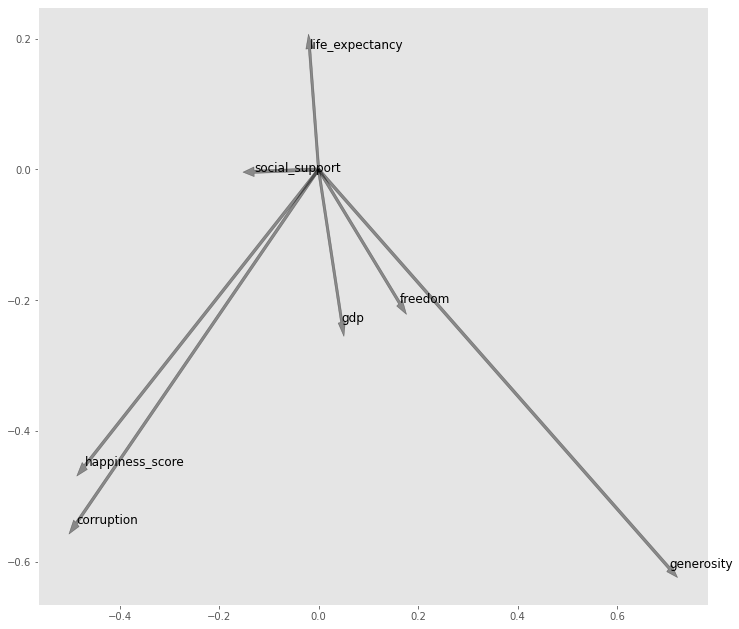

In [27]:
plt.figure(figsize = (12, 11))
plt.grid(False)
cols = X.columns
for i in range(len(cols)):
    x = pca.components_[i][0]
    y = pca.components_[i][1]
    plt.arrow(0, 0, x, y, color = "black", width = 0.005, alpha = .4)
    plt.annotate(cols[i], xy = (x, y), fontsize = 12)

### ML with PCA

One thing that also makes dimensionality reduction useful is that we can train machine learning models on dimensionality reduced data and achieve a similar performance.

Let's analyze the relationship between principal components and the performance of a machine learning model. 

The plan
1. Train a machine learning model on the untransformed data — this is our baseline. Observe accuracy score.
2. Train a machine learning on the PCA transformed data for every value between 1 and the number of dimensions.
3. Plot the number of components used to train a model versus their performance in terms of accuracy and time elapsed in training the model.

In [32]:
#Load in diamonds data. We're gonna take a random sample of 15k rows to save time.

diamonds = pd.read_csv("data/diamonds.csv", index_col=[0]).sample(n=15000, random_state = 2).reset_index(drop=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.40,Very Good,H,VS2,62.1,56.0,746,4.72,4.75,2.94
1,0.71,Good,E,SI2,57.8,60.0,2215,5.86,5.83,3.38
2,0.33,Premium,G,VS1,61.9,58.0,666,4.43,4.46,2.75
3,1.70,Premium,G,SI2,61.9,58.0,10472,7.61,7.57,4.70
4,0.77,Ideal,E,SI1,61.6,57.0,3189,5.87,5.91,3.63


#### Diamond Data Dictionary
**price:** price in US dollars (\$326--\$18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)


In [33]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    15000 non-null  float64
 1   cut      15000 non-null  object 
 2   color    15000 non-null  object 
 3   clarity  15000 non-null  object 
 4   depth    15000 non-null  float64
 5   table    15000 non-null  float64
 6   price    15000 non-null  int64  
 7   x        15000 non-null  float64
 8   y        15000 non-null  float64
 9   z        15000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [34]:
#Imports 
from time import time
from sklearn.model_selection import  cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

#grab X and y

X = diamonds.drop("cut", axis = 1)
y = diamonds["cut"]


In [35]:
#To keep things simple let's use just numerical features

X = X.select_dtypes("number")
X.head()

,carat,depth,table,price,x,y,z
0,0.40,62.1,56.0,746,4.72,4.75,2.94
1,0.71,57.8,60.0,2215,5.86,5.83,3.38
2,0.33,61.9,58.0,666,4.43,4.46,2.75
3,1.70,61.9,58.0,10472,7.61,7.57,4.70
4,0.77,61.6,57.0,3189,5.87,5.91,3.63


In [36]:
X.shape

(15000, 7)

There are seven dimensions with which we're starting from.

In [37]:
#Scale the data

diamonds_scaler = StandardScaler()
Xs = diamonds_scaler.fit_transform(X)

Establish the baseline scores. We'll be deriving the cross-validated accuracy score for our non-PCA datasets and we'll observe the time taken to train that model.

In [38]:
#Initialize k-fold with 5 splits
kf = KFold(n_splits=5)
#Intialize model
lr = LogisticRegression(random_state=1, max_iter = 300)
#Intialize time object
start = time()
#Run cross validation
baseline_score = cross_val_score(lr, Xs, y, cv=kf, scoring = "accuracy").mean().round(3)
end = time()
baseline_elapsed = round(end-start, 3)

print("The baseline model achieved a {} accuracy and took {} seconds to complete".format(baseline_score, baseline_elapsed))

The baseline model achieved a 0.656 accuracy and took 3.268 seconds to complete


Now we apply PCA to our data and train a model for a range of components between 1 and the number of dimensions of our data. We collect the cross-validated accuracy scores and then plot them.

In [39]:
#Intialize PCA model
pca = PCA()

#Transform data
Xpca = pca.fit_transform(Xs)

acc_scores = []

times = []

components_range = np.arange(1, Xs.shape[1] + 1)

for comp in components_range:
    #Slice the columns of the Xpca matrix using comp
    pca_features = Xpca[:, :comp]
    
    #cross-validate
    start = time()
    cv_mean = cross_val_score(lr, pca_features, y, cv=kf, scoring = "accuracy").mean()
    end = time()
    elapsed = end - start
    
    acc_scores.append(cv_mean)
    times.append(elapsed)
    
    

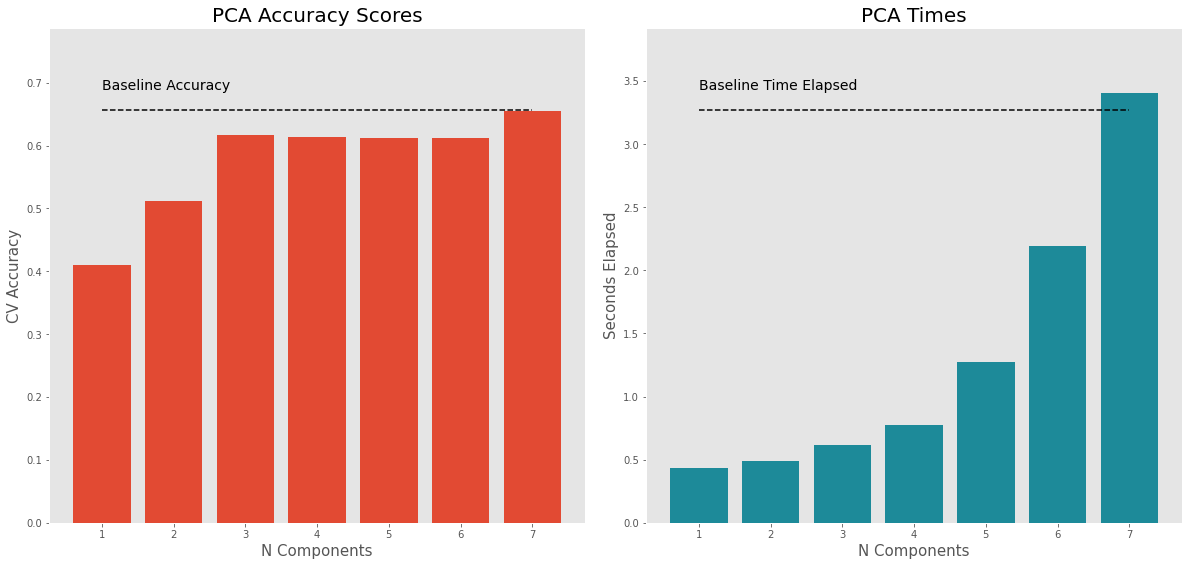

In [41]:
#Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (17, 8))

fig.tight_layout(pad = 3)
ax1.bar(components_range, acc_scores)
ax1.set_title("PCA Accuracy Scores", fontsize= 20)
ax1.set_xlabel("N Components", fontsize = 15)
ax1.set_ylabel("CV Accuracy", fontsize = 15)
ax1.hlines(y = baseline_score, xmin = components_range.min(), xmax = components_range.max(),
          colors = "black", linestyles = "dashed")
ax1.annotate(text = 'Baseline Accuracy', xy = (1, baseline_score*1.05),size = 14)
ax1.set_ylim(bottom=0, top = baseline_score*1.2)
ax1.grid(False)



ax2.set_title("PCA Times", fontsize= 20)
ax2.bar(components_range, times, color = "#1D8A99")
ax2.set_xlabel("N Components", fontsize = 15)
ax2.set_ylabel("Seconds Elapsed", fontsize = 15)
ax2.hlines(y = baseline_elapsed, xmin = components_range.min(), xmax = components_range.max(),
          colors = "black", linestyles = "dashed")
ax2.annotate(text = 'Baseline Time Elapsed', xy = (1, baseline_elapsed*1.05),size = 14)
ax2.set_ylim(bottom=0, top = baseline_elapsed*1.2)
ax2.grid(False);

**What do these two charts tell us about the tell timing-vs-performance tradeoff when we train a model on PCA components**

## t-SNE

![](https://tse2.mm.bing.net/th?id=OIP.OvotzpNWbWE8wZht7Pw3_QHaGF&w=690&c=7&pid=Api&p=0)

t-SNE is another popular dimensionality reduction algorithm that is really popular when visualizing high-dimensional plots into a 2 or 3 d space. What gives it an advantage over PCA is that it's more suitable for non-linear data.

t-SNE works by producing a joint probability distribution that effectively measures correlations between data. The basis for this distribution comes from calculating the euclidean distance between every datapoint pair, the smaller the distance means the higher probability that two points are similar.

Next t-SNE initializes the output dimensions with random data and through a process to similar to gradient descent continously transforms the random so that its joint probability distribution is as similar possible to that of the original data.

### Coding t-SNE

The most important parameter in t-SNE is perplexity whic is used to set the number of neighbors that are used in calculating the joint distributions mentioned previously. The following image shows four differents of t-SNE applied to the same dataset but with varying values for its perplexity parameter.

![](https://tse2.mm.bing.net/th?id=OIP.C_e2LzgeM_TC7LcC15U_QQHaGj&w=690&c=7&pid=Api&p=0)


For more how t-SNE works and how parameters impact its transformation check out [this excellent tutorial](https://distill.pub/2016/misread-tsne/).

Before we use t-SNE, let's all first install the [ploty-express plotting](https://plotly.com/python/plotly-express/) package which will let us create interactive visualizations.

If you do not have plotly-express installed, run the following command.

In [43]:
#!pip install plotly-express

Now let's apply t-SNE to the world happiness data.

In [48]:
#Redefine X
X = happiness.iloc[:, 2:-1]
X.head()

,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption
0,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [55]:
tsne = TSNE(n_components=2, perplexity=40, random_state=2, learning_rate=1)

Xt = tsne.fit_transform(X)
Xt = pd.DataFrame(Xt, columns=["tsne1", "tsne2"])
Xt.head()

,tsne1,tsne2
0,-1.690936,9.992281
1,-1.534124,9.834429
2,-1.991676,9.443829
3,-1.282660,9.679596
4,-1.676620,9.307104


Re-produce the earlier plot where visualize the country dots color-encoded by continent

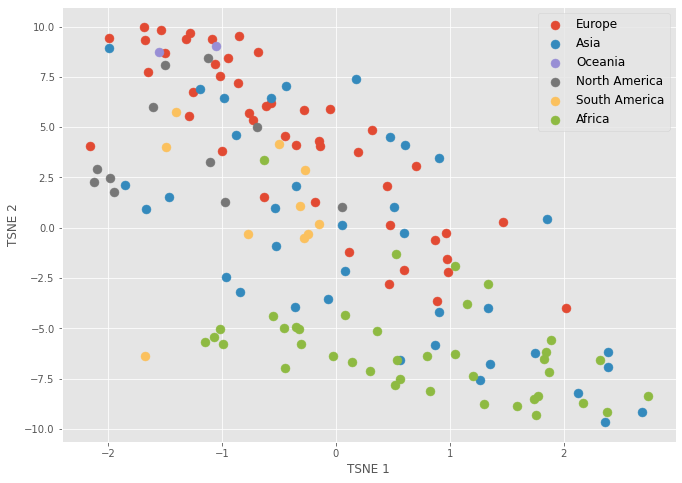

In [56]:

#Add continent to the pca dataset
Xt["continent"] = happiness["continent"].tolist()

plt.figure(figsize=(11, 8))
for continent in Xt.continent.unique():
    data = Xt[Xt.continent == continent]
    
#     data.plot.scatter(x = "comp1", y = "comp2", label = continent)
    plt.scatter(x=data["tsne1"], y = data["tsne2"], label = continent, s=80)
    plt.xlabel("TSNE 1")
    plt.ylabel("TSNE 2")
    plt.legend(fontsize = "large");
    

This chart is great and all but what I really would like to do is be able to hover my mouse over the dots to reveal more information about the country dots.

That's where plotly-express comes in!

Let's create an interactive 2D plot using plotly-express.

In [61]:


#import plotly-express
import plotly.express as px

#Add the country name into Xt
Xt["country"] = happiness["country"].tolist()

#intialize plotting function
fig = px.scatter(Xt, x="tsne1", y = "tsne2", color="continent", hover_data=["country"])
#generate plot
fig.show()

Hover your mouse over the dots to see which countries they represent.

Let's improve the plot by making the dots larger and showing the original data when you hover over them.

In [67]:
#Add size variable to the dataframe
Xt["size"] = .3

#Add happiness score and gdp to Xt
Xt["happiness"] = happiness.happiness_score.tolist()
Xt["gdp"] = happiness.gdp.tolist()

#This dictionary allows us to turn on and turn off our chosen variables

hover_data={"country":True, 
            "continent":True, 
            "happiness":True,
            "gdp":True,
            "tsne1":False,
            "tsne2":False,
            "size":False}


#intialize plotting function
fig = px.scatter(Xt, x="tsne1", y = "tsne2", color="continent", 
                 hover_data=hover_data, size="size", opacity=.6)
#generate plot
fig.show()

How does it look now?!